In [178]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud,STOPWORDS
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
f = open('products.json')
data = json.load(f) # returns JSON object as a dictionary
data[223]

{'sku': 1057082,
 'name': 'Isaac Mizrahi New York - Hard Shell Case for Apple° iPhone° SE, 5s and 5 - Pink',
 'type': 'HardGood',
 'price': 4.99,
 'upc': '5031300084600',
 'category': [{'id': 'abcat0800000', 'name': 'Cell Phones'},
  {'id': 'abcat0811002', 'name': 'Cell Phone Accessories'},
  {'id': 'pcmcat191200050015', 'name': 'iPhone Accessories'},
  {'id': 'pcmcat214700050000', 'name': 'iPhone Cases & Clips'}],
 'shipping': 0,
 'description': 'Only at Best Buy\nCompatible with Apple iPhone SE, 5s and 5; polycarbonate and TPU construction; play-through design',
 'manufacturer': 'Isaac Mizrahi New York',
 'model': 'CO8460',
 'url': 'http://www.bestbuy.com/site/isaac-mizrahi-new-york-hard-shell-case-for-apple-iphone-se-5s-and-5-pink/1057082.p?id=1219461889371&skuId=1057082&cmp=RMXCC',
 'image': 'http://img.bbystatic.com/BestBuy_US/images/pac/products/1312/1312657746/1312657746_sa.jpg'}

In [204]:
# creating dataframe with three rows (name,description,categories)
column_names = ['name','description','categories']
large_cats = ['Appliances',
              'Cell Phones',
              'Audio']
df = pd.DataFrame(columns = column_names)

names,descriptions,categories = [],[],[]
for product in data:
    names.append(product['name'])
    descriptions.append(product['description'])
#     if product['category'][0]['name'] == 'Cell Phones' and len(product['category']) == 3:
#         print(product['name'])
#         print(product['category'][1]['name'])
    if product['category'][0]['name'] in large_cats  and len(product['category']) > 1:
        categories.append(product['category'][1]['name'])
    else:
        categories.append(product['category'][0]['name'])
  
df = pd.DataFrame(list(zip(names,descriptions,categories)) ,columns = column_names)

In [187]:
cat = pd.DataFrame(df['categories'].to_list()) # listing the categories seperately
cat.head()

,0
0,Connected Home & Housewares
1,Connected Home & Housewares
2,Connected Home & Housewares
3,Connected Home & Housewares
4,Connected Home & Housewares


In [5]:
# finding total unique categories/classes from which our prediction will belong too

df.head()
#cates = np.concatenate([category_0, category_1, category_2,category_3,category_4,category_5,category_6])
#cates = list(dict.fromkeys(cates))
#cates = [x for x in cates if x is not None] # remove None


,name,description,categories
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,Connected Home & Housewares
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,Connected Home & Housewares
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,Connected Home & Housewares
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,Connected Home & Housewares
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,Connected Home & Housewares


Index(['Connected Home & Housewares', 'Car Electronics & GPS',
       'Musical Instruments', 'Toys, Games & Drones', 'Video Games',
       'Cameras & Camcorders', 'Computers & Tablets',
       'Ranges, Cooktops & Ovens', 'Headphones', 'Small Kitchen Appliances',
       'Freezers & Ice Makers', 'TV & Home Theater',
       'Health, Fitness & Beauty', 'Name Brands',
       'Heating, Cooling & Air Quality', 'Cell Phone Accessories',
       'Home Audio', 'Refrigerators', 'iPod & MP3 Player Accessories',
       'Microwaves', 'Washers & Dryers', 'Bluetooth & Wireless Speakers',
       'Vacuum Cleaners & Floor Care', 'Unlocked Cell Phones',
       'Home Audio Accessories', 'Dishwashers',
       'Appliance Parts & Accessories', 'Magnolia Home Theater',
       'All Cell Phones with Plans', 'Best Buy Gift Cards',
       'Wearable Technology'],
      dtype='object')


<Axes: >

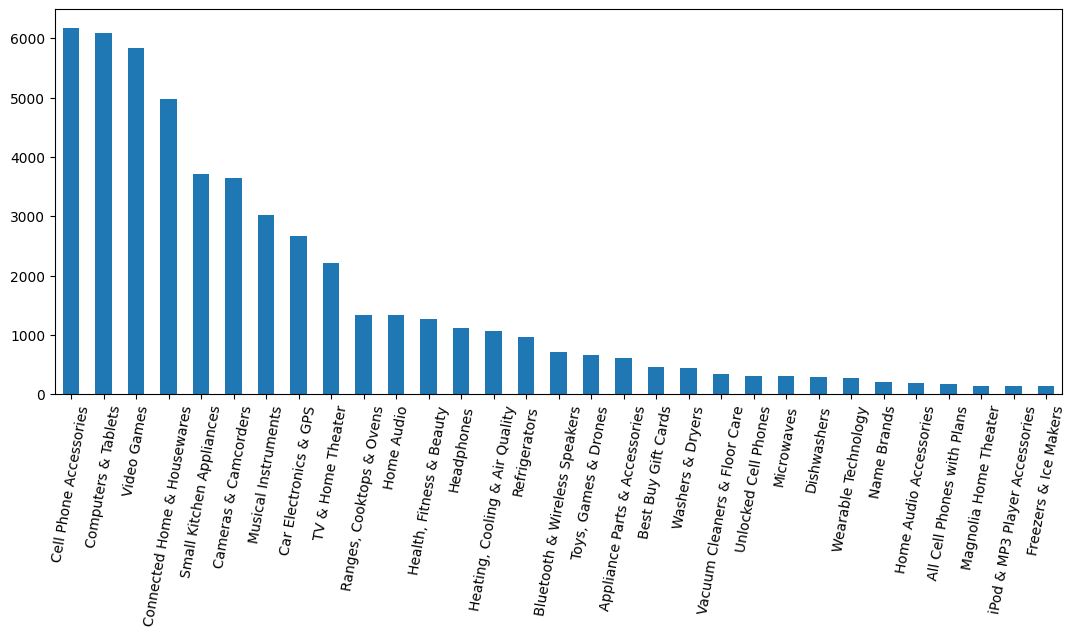

In [217]:
threshold = 100;
df_category_count = df.categories.value_counts()[df.categories.unique()]
dict_category_count = df_category_count.loc[lambda x : x >= threshold]
print(dict_category_count.keys())
dict_category_count.sort_values(ascending=False).plot(kind='bar', alpha=1, rot=80, figsize=(13,5))

In [65]:
print('before: ' + str(len(df)))
df_cleaned = df[df.loc[:,"categories"].isin(dict_category_count.keys())]
print('before: ' + str(len(query_result))) 

before: 51646
before: 44447


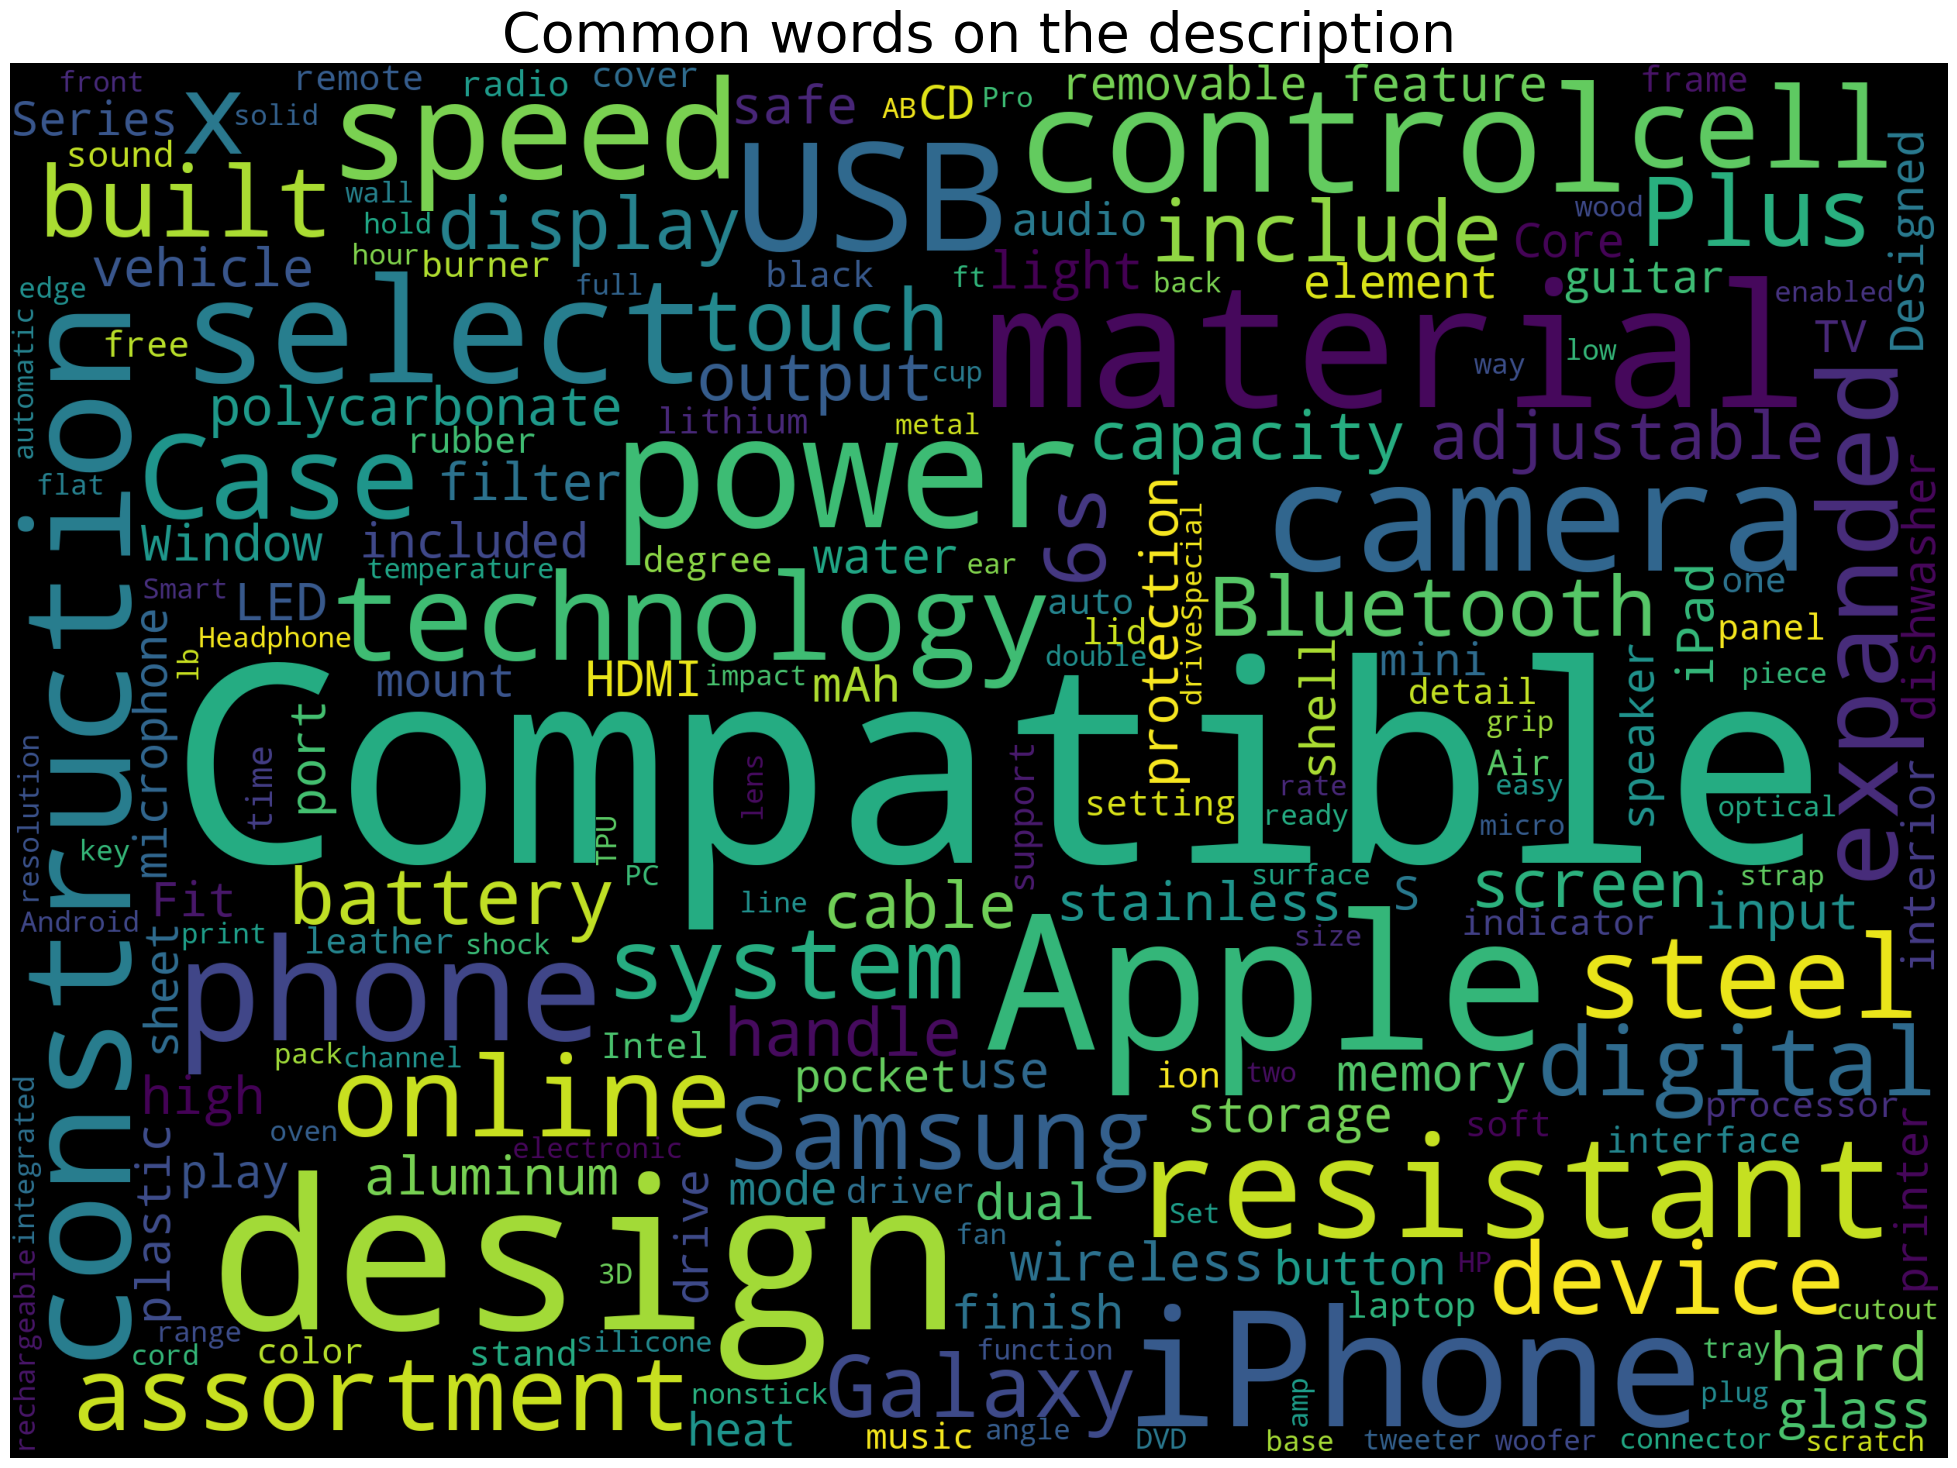

In [ ]:

plt.figure(figsize=(25,25))
text = df_cleaned.description.values
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  collocations=False,
                  width=2500,
                  height=1800
                  ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words on the description",fontsize=40)
plt.imshow(cloud)

In [48]:
# Utility function for data cleaning, natural language processing concepts

def decontract(sentence):
    sentence = str(sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence): 
    sentence = str(sentence)
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    sentence = str(sentence)
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    sentence = str(sentence)
    global re_stop_words
    return re_stop_words.sub("", sentence)

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\W", re.I)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    sentence = str(sentence)
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [74]:
# Applying data cleaning on product name to ignore irrelevant words
pd.options.mode.chained_assignment = None

df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].str.lower()
df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].apply(decontract)
df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].apply(cleanPunc)
df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].apply(keepAlpha)
df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].apply(removeStopWords)
df_cleaned.loc[:, 'name'] = df_cleaned.loc[:, 'name'].apply(stemming)

# Applying data cleaning on description to ignore irrelevant words
df_cleaned.loc[:, 'description'] = df_cleaned['description'].str.lower()
df_cleaned.loc[:, 'description'] = df_cleaned['description'].apply(decontract)
df_cleaned.loc[:, 'description'] = df_cleaned['description'].apply(cleanPunc)
df_cleaned.loc[:, 'description'] = df_cleaned['description'].apply(keepAlpha)
df_cleaned.loc[:, 'description'] = df_cleaned['description'].apply(removeStopWords)
df_cleaned.loc[:, 'description'] = df_cleaned['description'].apply(stemming)

     

In [76]:
# creating new column information which is concatenation of product name and description, which stores overall context about any product
pd.options.mode.chained_assignment = None
df_cleaned["information"] = df_cleaned["name"] + df_cleaned["description"]
df_cleaned.tail()

,name,description,categories,information
51638,,runtast wristband runtast orbit activ tracker ...,"Health, Fitness & Beauty",runtast wristband runtast orbit activ tracker ...
51639,,runtast color wrist band runtast orbit count c...,"Health, Fitness & Beauty",runtast color wrist band runtast orbit count c...
51643,,x total bay x bay,Computers & Tablets,x total bay x bay
51644,,stream p content dualband dualantenna wifi mim...,TV & Home Theater,stream p content dualband dualantenna wifi mim...
51645,,proctor silex slice toaster oven bake broil to...,Small Kitchen Appliances,proctor silex slice toaster oven bake broil to...


In [180]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['information'], 
                                                    df_cleaned['categories'], 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    shuffle=True)
# vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2') # Using a tf-idf weighting scheme rather than normal boolean weights for better performance
# vectorizer.fit(X_train)
# vectorizer.fit(y_train)

# X_train = vectorizer.transform(X_train)
# y_train = vectorizer.transform(y_train)
# y_test = vectorizer.transform(y_test)
# X_train = X_train.asarray()
# y_train = y_train.asarray()
print(X_train)

tf_vectorizer = CountVectorizer() # or term frequency

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)


23510    galaxi audio headset microphon compat wireless...
25977    gravityactiv design ceram grinder stainlessste...
23184    adlen adjustablefocus comput glass filter hev ...
5469     tplink wireless ac wall plug univ wifi rang ex...
18108       track spend make smart invest pay bill softwar
                               ...                        
35572                  compat appl iphon hard shell materi
24637    compat almost today mirrorless csc camera made...
49602    screen innov seri fix projector screen h x w v...
50656      compat air condit reduc draft dust moistur pack
3038                                 help kitti move world
Name: information, Length: 35557, dtype: object


MultinomialNB()

In [177]:
y_pred = naive_bayes_classifier.predict(X_test_tf)



print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9038245219347582


In [218]:
#print(X_test_tf)

x_real = ['Book']

x_real_tf = tf_vectorizer.transform(x_real)


result = naive_bayes_classifier.predict(x_real_tf)
print(result)

['Musical Instruments']
